# Stock Market Prediction Project
By Alexa Rockwell

In [1]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

data = pd.read_csv("data.csv", parse_dates=["date"], index_col="date")
x = pd.DataFrame(data)
x.head(10)

,signal,spy_close_price
date,,
2012-01-03,3.107767,127.495
2012-01-04,3.107282,127.700
2012-01-05,3.099757,128.040
2012-01-06,3.134223,127.710
2012-01-09,3.135922,128.020
2012-01-10,3.143447,129.130
2012-01-11,3.127184,129.200
2012-01-12,3.139320,129.510
2012-01-13,3.174029,128.840


## CLEAN UP THE DATA

We clean the data by removing the outliers that exist in the data

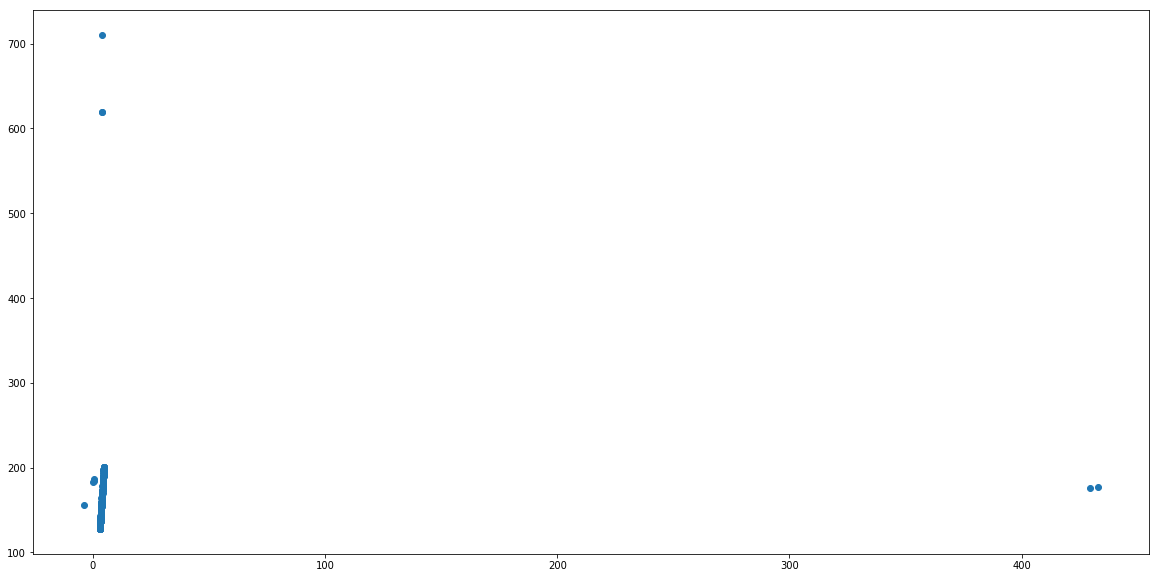

In [2]:
#claim: there's a correlation btw signal and close_price

#first step is to clean the data

plt.scatter(x['signal'], x['spy_close_price'])
plt.show()

Clearing out obvious outlier data

In [3]:
linear_data = x
linear_data = linear_data[linear_data.loc[:,'spy_close_price'] < 300]
linear_data = linear_data[linear_data.loc[:,'signal'] < 100]
linear_data = linear_data[linear_data.loc[:,'signal'] > 2]

### We can now see that their is indeed a correlation between signal and close price

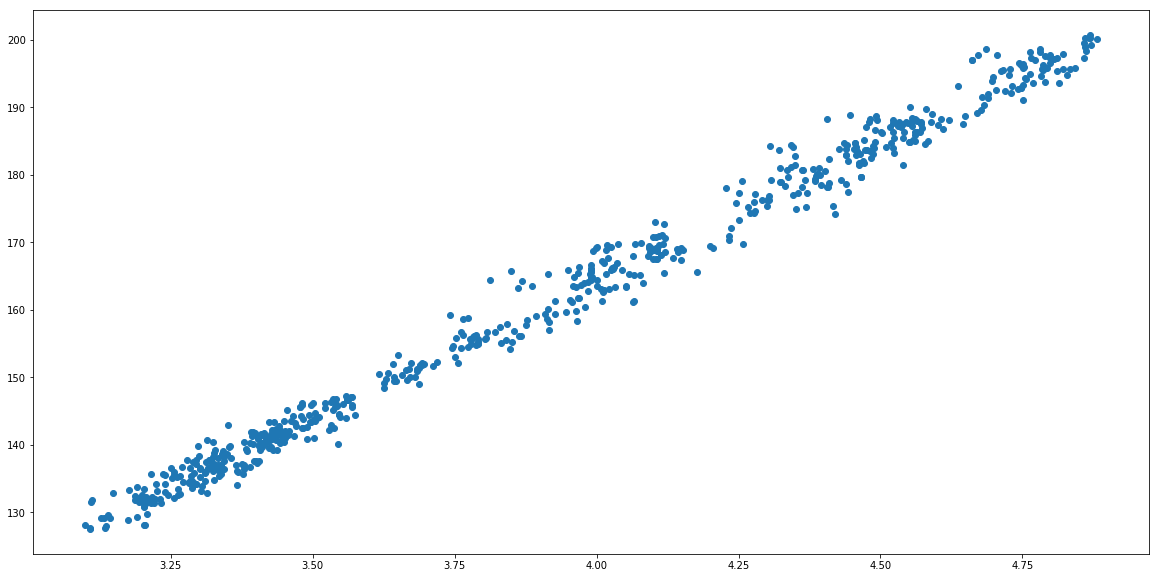

In [4]:
plt.scatter(linear_data['signal'], linear_data['spy_close_price'])
plt.show()

### After seeing the linear correlation, we can now model the data using Linear Regression.
### We then find the coefficient or slope of the line.
### The mean square error to see how well the line fits
$ MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i- \hat{Y_i})^2$
### Finally we find the R-Squared value to see how close the data fits the regression line

Coefficients: 
 [ 40.82405753]
Mean squared error: 4.54
R-squared = : 0.56


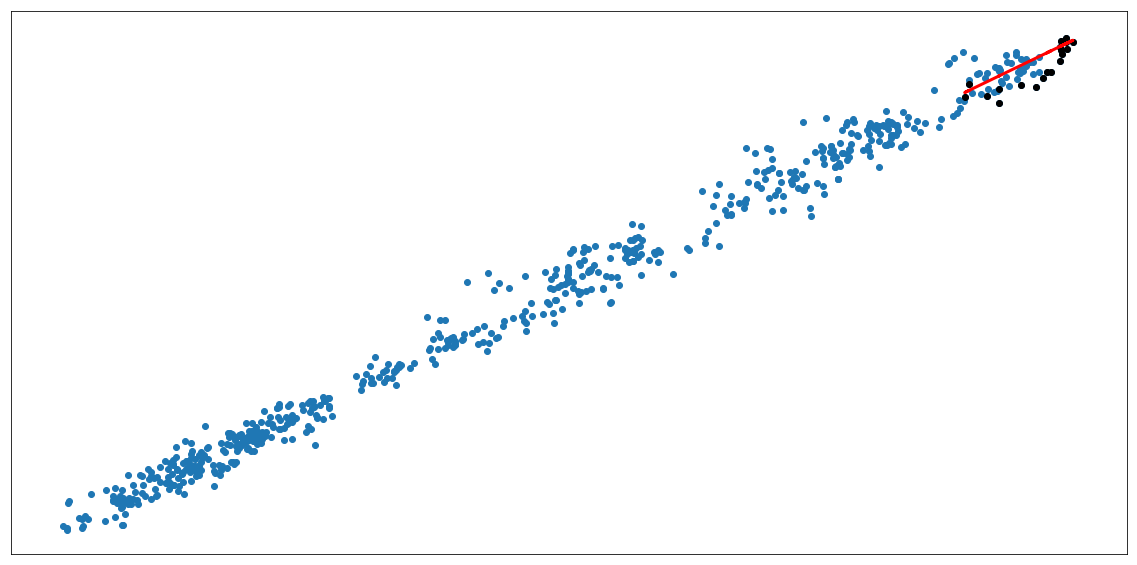

In [5]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training/testing sets
X_train = linear_data['signal'][:-20]
X_test = linear_data['signal'][-20:]

# Split the targets into training/testing sets
y_train = linear_data['spy_close_price'][:-20]
y_test = linear_data['spy_close_price'][-20:]

# Create linear regression object
regr = linear_model.LinearRegression()
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared = : %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(linear_data['signal'], linear_data['spy_close_price'])
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

cleaning outlier data for the date to closing price relationship

In [6]:
df = x
df = df[df.loc[:,'spy_close_price'] < 300]
df = df[df.loc[:,'spy_close_price'] > 0]

plotting the relationship between date and closing price - comparing raw data with cleaned

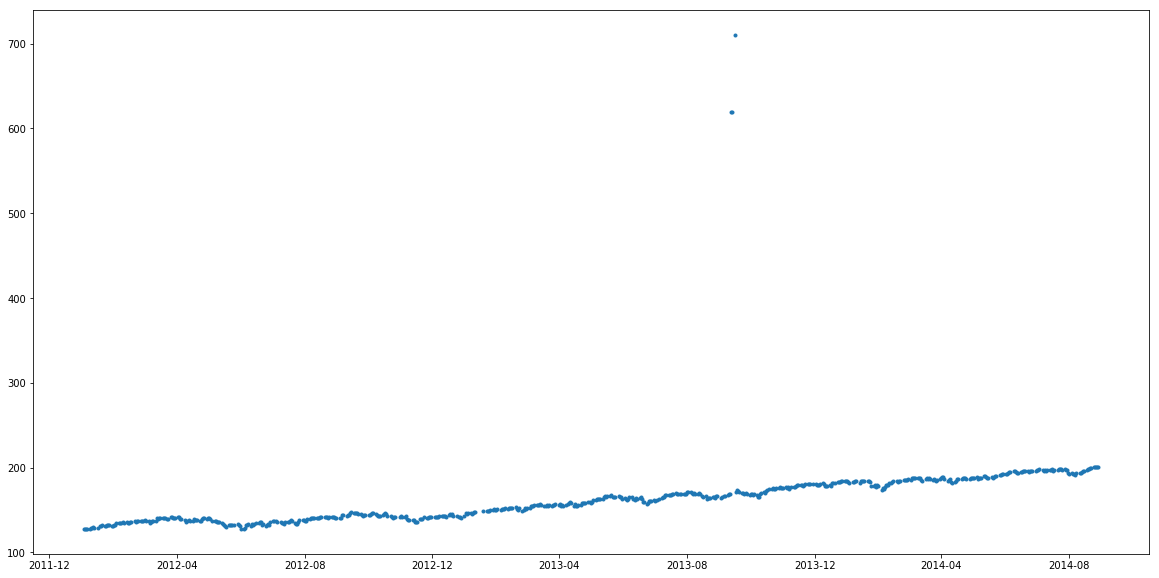

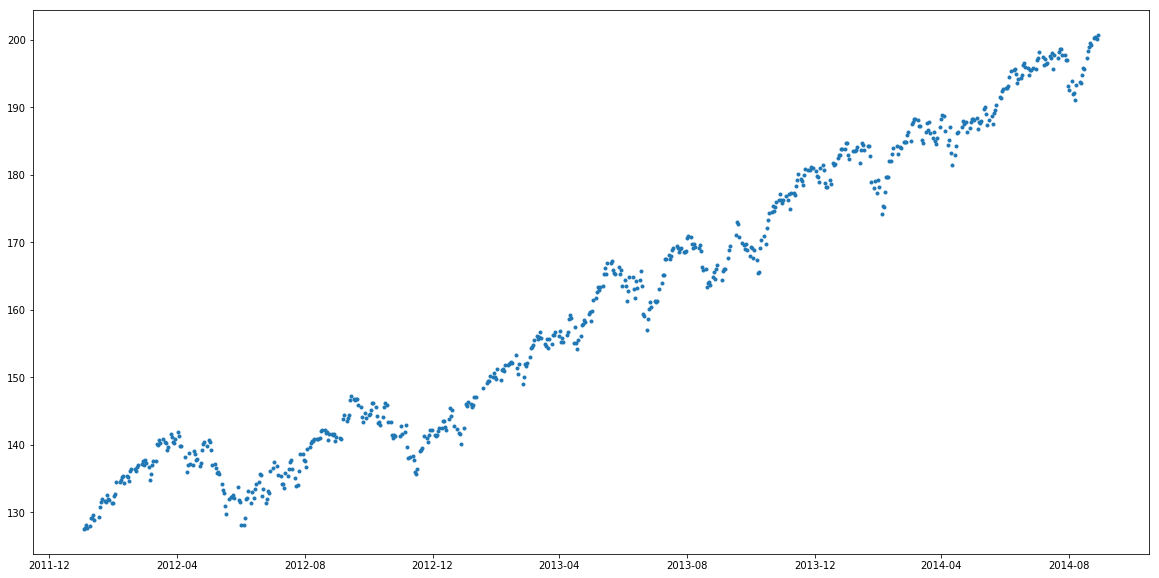

In [7]:
plt.plot(x.index.tolist(), x['spy_close_price'], '.')
plt.show()

plt.plot(df.index.tolist(), df['spy_close_price'], '.')
plt.show()

In [75]:
ts = df.drop(columns=['signal'])
ts.head()

,spy_close_price
date,
2012-01-03,127.495
2012-01-04,127.700
2012-01-05,128.040
2012-01-06,127.710
2012-01-09,128.020


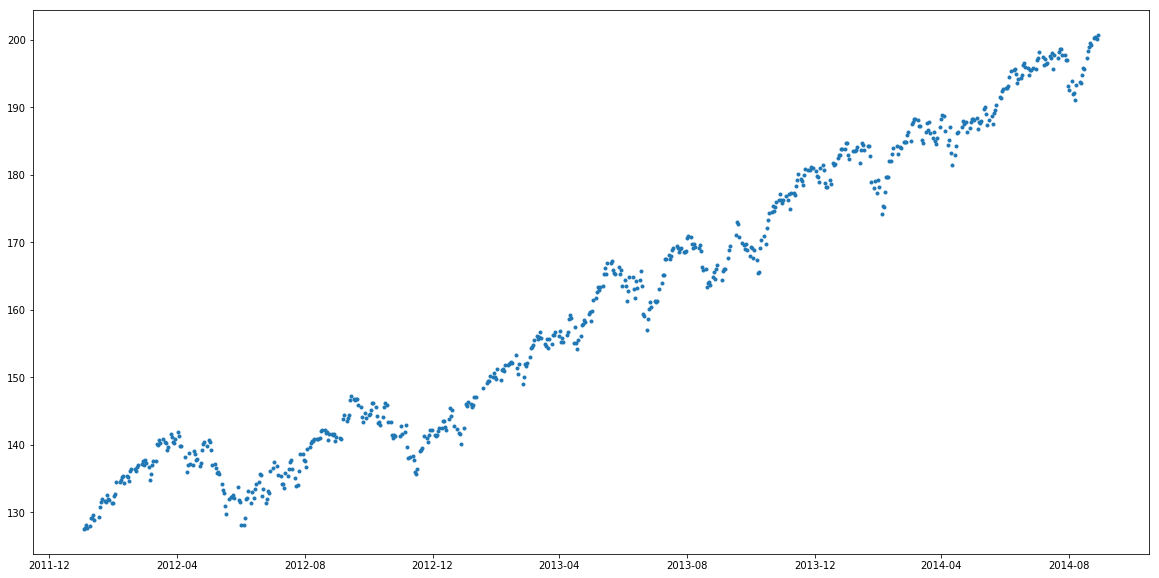

In [9]:
plt.plot(ts, '.')
plt.show()

## COMPUTATION
Back to checking stationarity, we’ll be using the rolling mean and standard deviation plots. We will later use these values when creating a model that changes over time - time series.

In [77]:
#citation: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
from statsmodels.tsa.stattools import adfuller

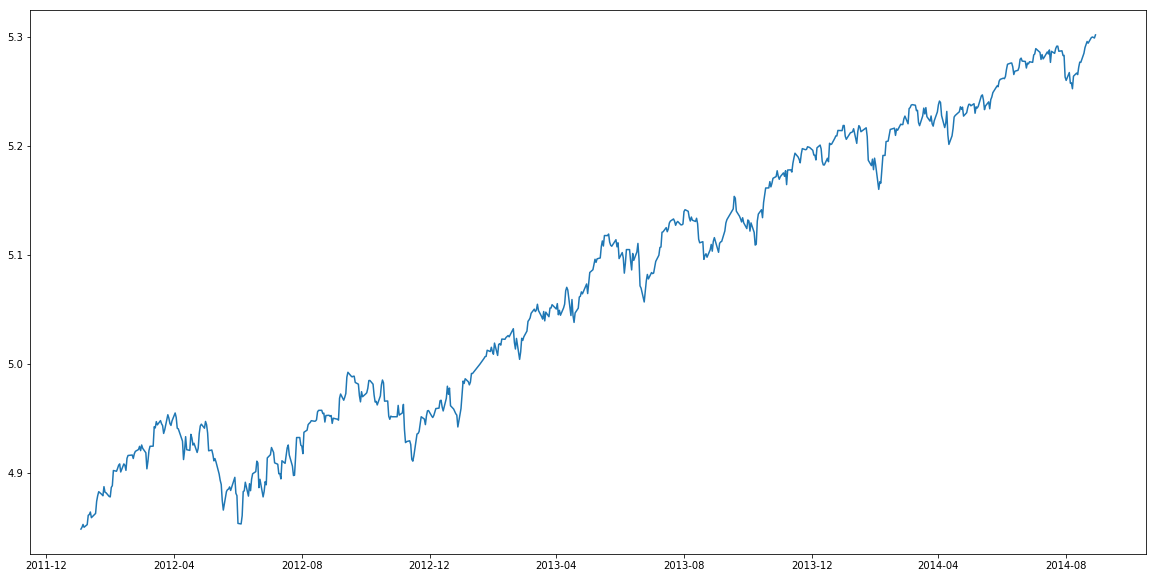

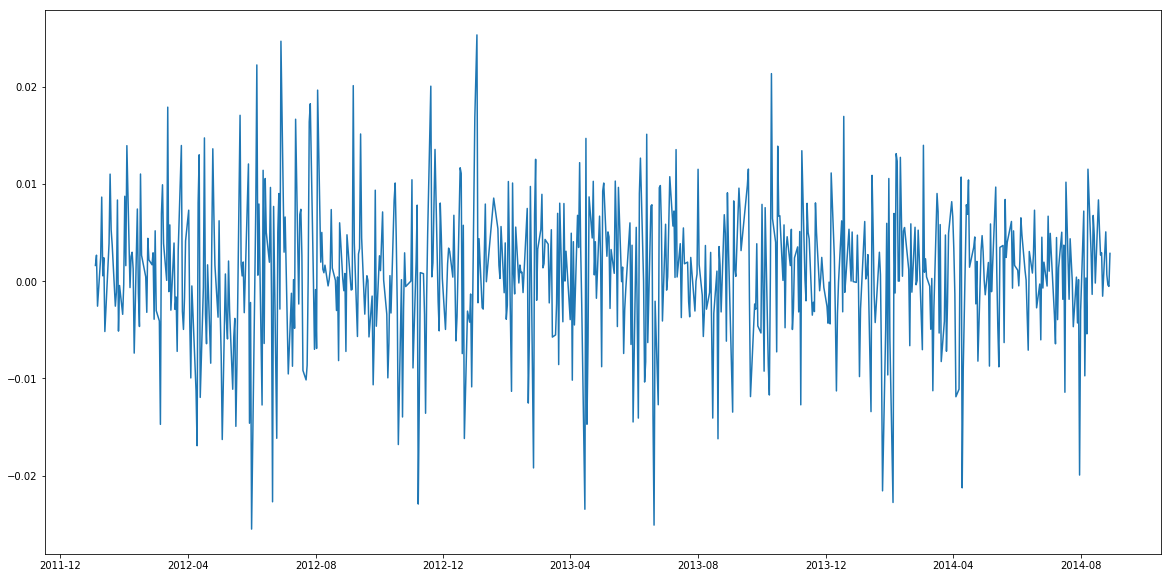

In [11]:
ts_log = np.log(ts)
plt.plot(ts_log)
plt.show()

ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

## FORCASTING TIME SERIES
### We use the autocorrelation function to find a pattern between the prices seperated by certain time periods.

To use ARIMA effectively, we need to determine the parameters of the model, the number of auto regressive terms, the number of moving average terms, and the number of differences.

We use the following two plot to determine the number of auto regressive terms, the number of moving average terms.

In [13]:
from statsmodels.tsa.stattools import acf, pacf

ts_log_diff.dropna(inplace=True)

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

ACF is a measure of the correlation between the the TS with a lagged version of itself. 

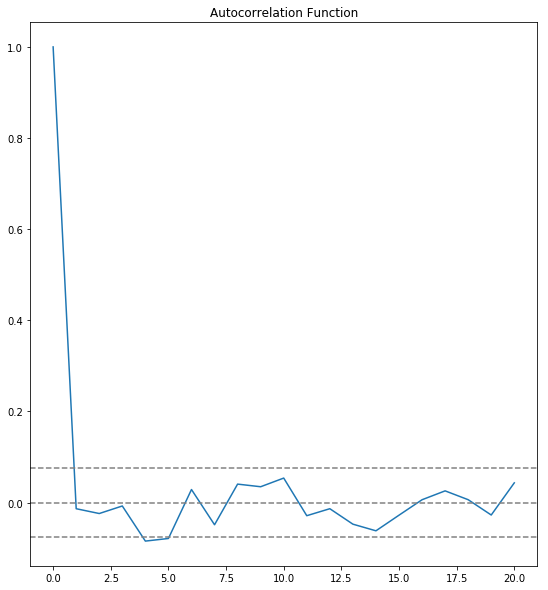

In [14]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

MA terms are lagged forecast errors in prediction equation.

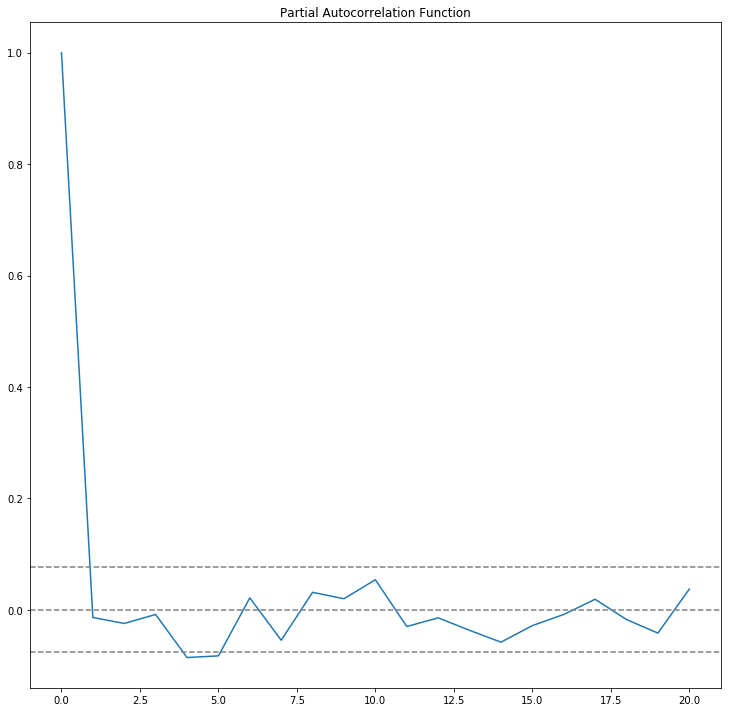

In [15]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [16]:
ts_log_diff.head()

,spy_close_price
date,
2012-01-04,0.001607
2012-01-05,0.002659
2012-01-06,-0.002581
2012-01-09,0.002424
2012-01-10,0.008633


### Auto Regressive Model

In [17]:
from statsmodels.tsa.arima_model import ARIMA

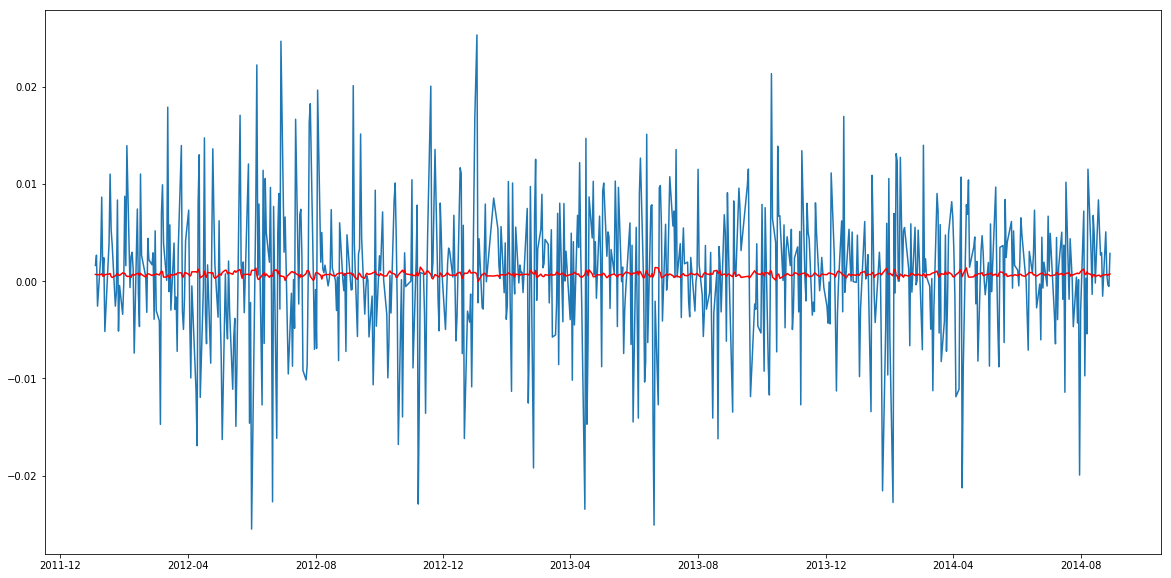

In [18]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.show()

### Moving Average Model

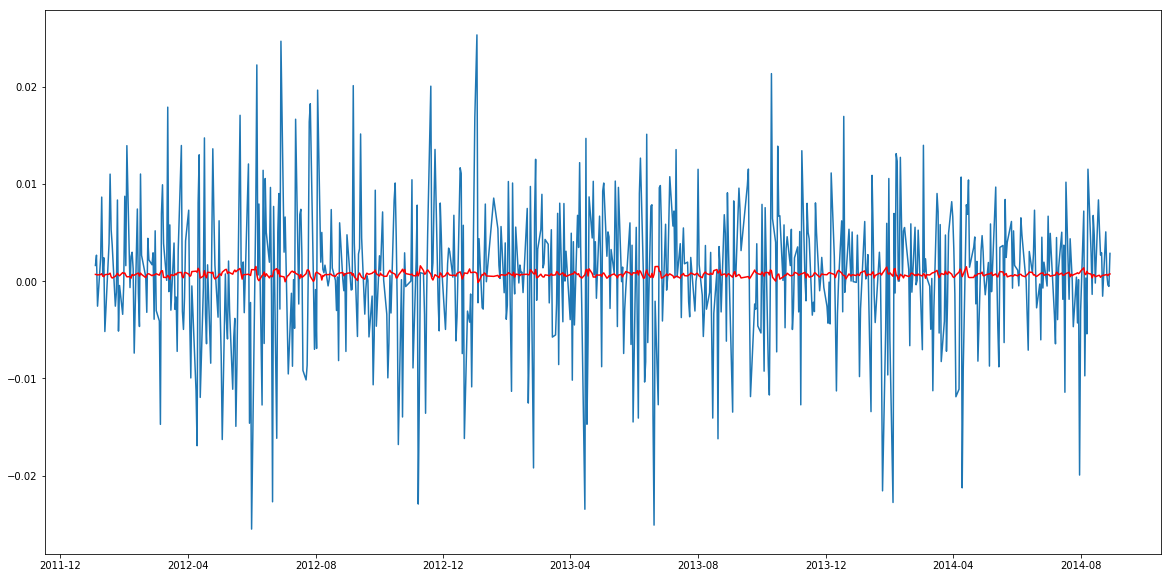

In [19]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.show()

### Combined Model

/Users/arkwl/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


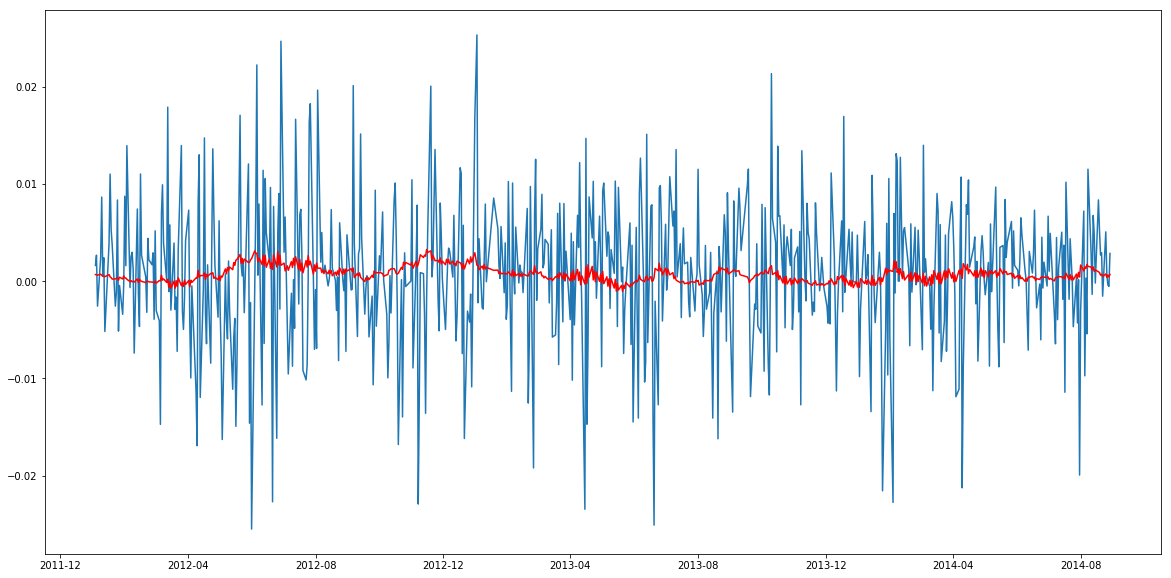

In [20]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.show()

## The following calculations will turn the trend taken from the combined model, and change the scale back to the original values
This step stores the predicted results as a seperate series.

In [21]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
2012-01-04    0.000667
2012-01-05    0.000644
2012-01-06    0.000609
2012-01-09    0.000708
2012-01-10    0.000597
dtype: float64


Get the cumulative difference

In [46]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

date
2012-01-04    0.000667
2012-01-05    0.001311
2012-01-06    0.001920
2012-01-09    0.002629
2012-01-10    0.003226
dtype: float64


Add it to the base number

In [47]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0][0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
2012-01-03    4.848077
2012-01-04    4.848744
2012-01-05    4.849388
2012-01-06    4.849997
2012-01-09    4.850706
dtype: float64

### Observe the forcast of the stock data

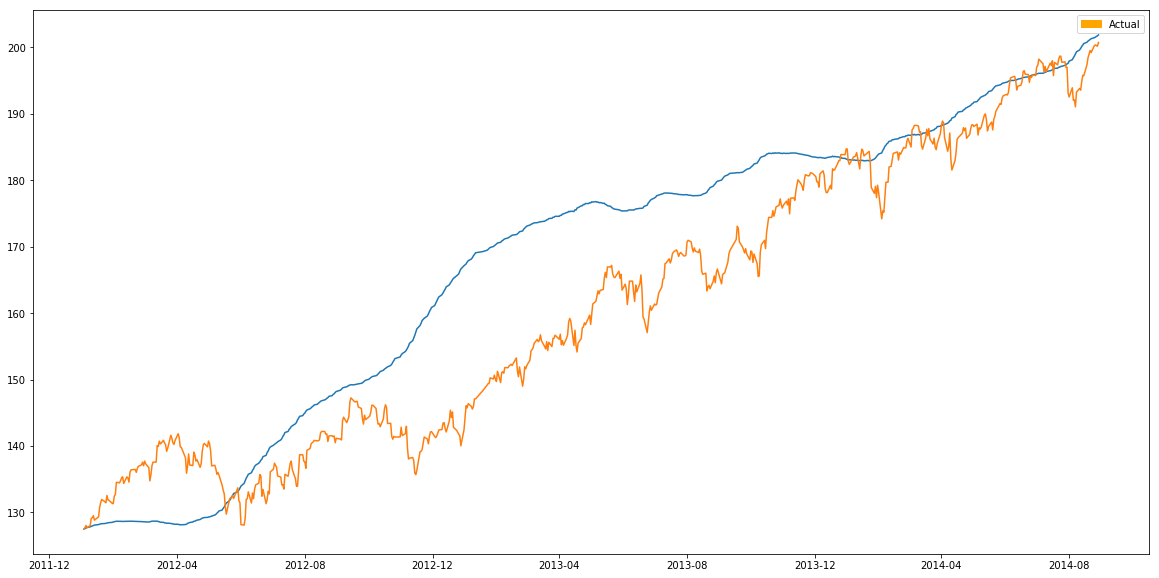

In [48]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(predictions_ARIMA)
#plt.show()
plt.plot(ts)
blue_patch = mpatches.Patch(color='blue', label='Prediction')
plt.legend(handles=[blue_patch])
orange_patch = mpatches.Patch(color='orange', label='Actual')
plt.legend(handles=[orange_patch])
plt.show()

In [76]:
print('R-Squared: %f'%(r2_score(ts.values, predictions_ARIMA.values)))

R-Squared: 0.745378


That's a great R-squared value!

# Here we start setting the data up to be used in a neural network create a model that can predict the stock prices

In [25]:
ts = ts.sort_index(axis=1, ascending=True)
ts = ts.iloc[::-1]

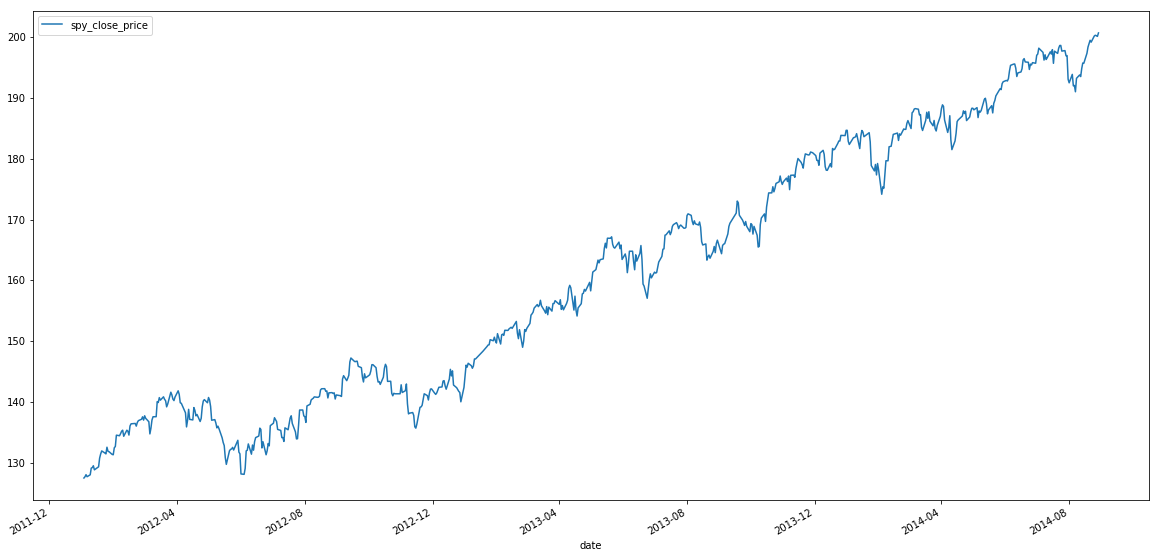

In [26]:
data = ts[['spy_close_price']]
data.plot(y='spy_close_price')
plt.show()

Split the data into train and test

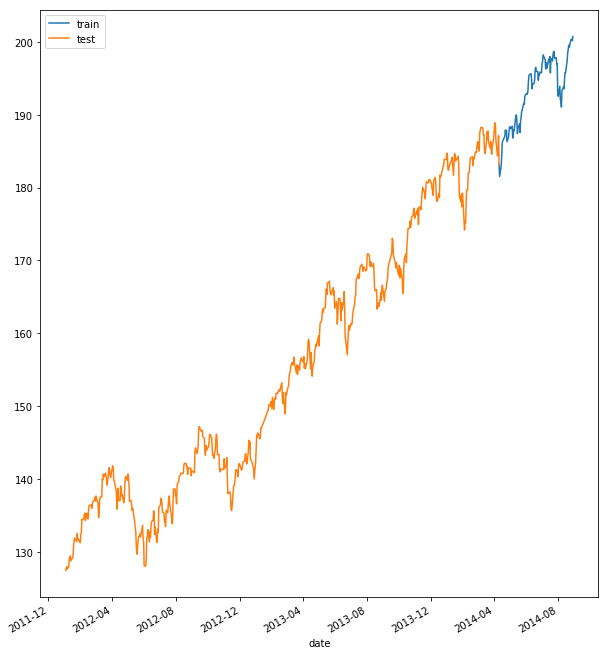

In [27]:
split_date = pd.Timestamp('04-10-2014')

train = data.loc[:split_date]
test = data.loc[split_date:]

ax = train.plot(figsize=(10,12))
test.plot(ax=ax)
plt.legend(['train', 'test'])
plt.show()

### The next few cells transfom the date to a float and create X_test, y_test, X_train and y_train


### X - the input - contains dates
### y - the output - contains stock prices

In [28]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [50]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)


X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

In [30]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (98 x 1)
Test size: (565 x 1)


## Setup baseline model of SVM Regressor
SVM Regressor is a sklearn model we will use to predict y based off our X_test. It shows a great r^2 score below

In [31]:
from sklearn.svm import SVR
regressor = SVR(kernel='linear')

In order for the model to create the results that are presented, we need to alterante between a linear and rbf kernel that's defined above.

Linear - predicts a linear model.

RBF (Gaussian) - Radial basis function that defines similarity to be the eudlicean distance between the two inputs (similar to nearest neighbor). If the two inputs are right ontop of eachother, they get the maximal similarity of 1. 

In [32]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

/Users/arkwl/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


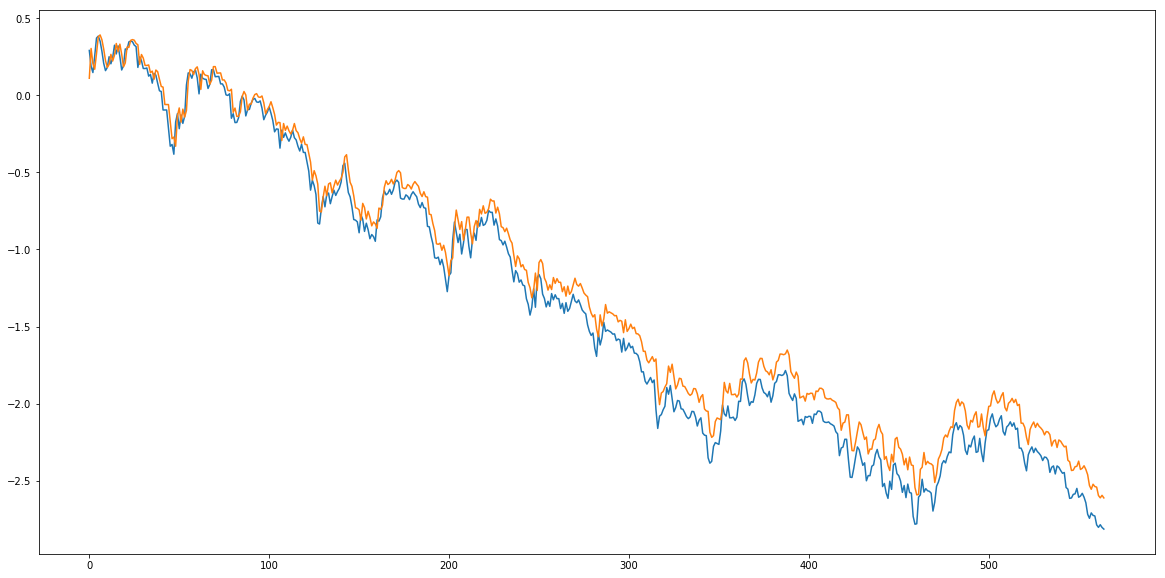

In [33]:
plt.plot(y_test)
plt.plot(y_pred)
plt.show()

In [34]:
from  sklearn.metrics import r2_score

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

r2_test = r2_score(y_test, y_pred)
print(r2_test)

0.97796018476


# Implementation of Tensorflow Neural Network

In [35]:
#citation: https://github.com/neelabhpant/Deep-Learning-in-Python/blob/master/Time%20Series%20Prediction.ipynb
#citaiton: https://blog.statsbot.co/time-series-prediction-using-recurrent-neural-networks-lstms-807fa6ca7f
from  keras.models  import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K

Using TensorFlow backend.


#### Description of Reccurent Neural Network Model

The model inherently is a regression, but it will use the predicted price of the previous day along with training data to predict the price of the next. 

As a loss function, we use mean squared error and stochastic gradient descent as an optimizer, which after enough numbers of epochs will try to look for a good local optimum.

## 1 hidden layer with neuron

In [36]:
K.clear_session()
model = Sequential()
model.add(Dense(1, input_shape=(X_test.shape[1],), activation='tanh', kernel_initializer='lecun_uniform'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
98/98 [==============================] - 0s 744us/step - loss: 0.1027
Epoch 2/20
98/98 [==============================] - 0s 74us/step - loss: 0.0969
Epoch 3/20
98/98 [==============================] - 0s 75us/step - loss: 0.0913
Epoch 4/20
98/98 [==============================] - 0s 67us/step - loss: 0.0862
Epoch 5/20
98/98 [==============================] - 0s 71us/step - loss: 0.0814
Epoch 6/20
98/98 [==============================] - 0s 78us/step - loss: 0.0770
Epoch 7/20
98/98 [==============================] - 0s 72us/step - loss: 0.0726
Epoch 8/20
98/98 [==============================] - 0s 76us/step - loss: 0.0686
Epoch 9/20
98/98 [==============================] - 0s 67us/step - loss: 0.0646
Epoch 10/20
98/98 [==============================] - 0s 74us/step - loss: 0.0610
Epoch 11/20
98/98 [==============================] - 0s 70us/step - loss: 0.0576
Epoch 12/20
98/98 [==============================] - 0s 71us/step - loss: 0.0546
Epoch 13/20
98/98 [=================

R-Squared: -0.152013


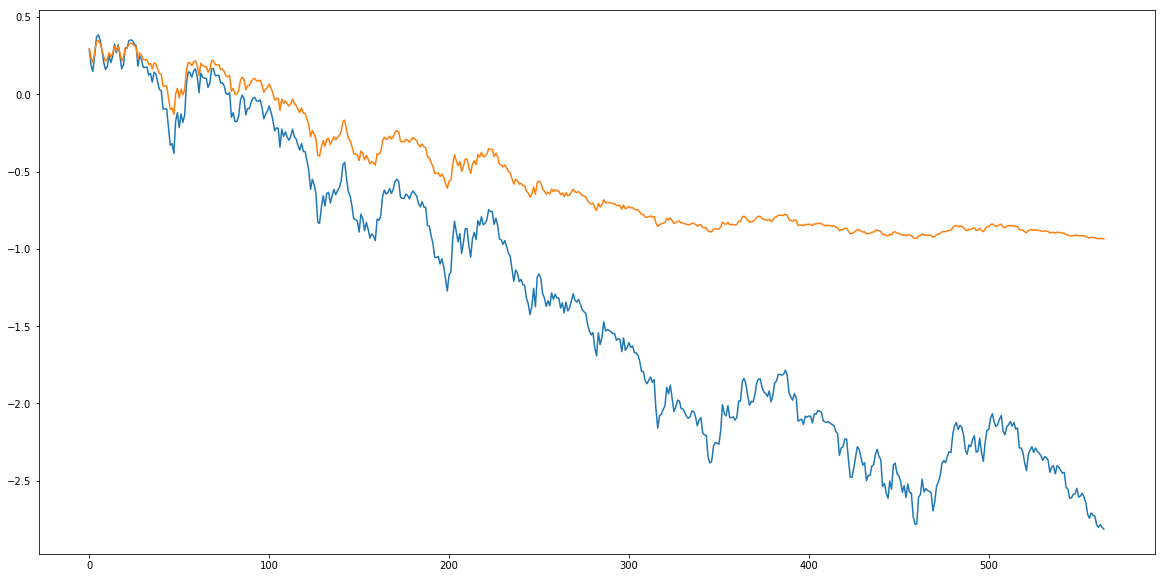

In [37]:
y_pred = model.predict(y_test)
plt.plot(y_test)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))
plt.show()

### 1 Hidden Layer with 2 neurons and ReLU activation function


In [38]:
K.clear_session()
model = Sequential()
model.add(Dense(2, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
98/98 [==============================] - 0s 1ms/step - loss: 0.0573
Epoch 2/20
98/98 [==============================] - 0s 97us/step - loss: 0.0496
Epoch 3/20
98/98 [==============================] - 0s 85us/step - loss: 0.0423
Epoch 4/20
98/98 [==============================] - 0s 102us/step - loss: 0.0357
Epoch 5/20
98/98 [==============================] - 0s 92us/step - loss: 0.0298
Epoch 6/20
98/98 [==============================] - 0s 92us/step - loss: 0.0249
Epoch 7/20
98/98 [==============================] - 0s 87us/step - loss: 0.0207
Epoch 8/20
98/98 [==============================] - 0s 84us/step - loss: 0.0169
Epoch 9/20
98/98 [==============================] - 0s 97us/step - loss: 0.0140
Epoch 10/20
98/98 [==============================] - 0s 100us/step - loss: 0.0117
Epoch 11/20
98/98 [==============================] - 0s 83us/step - loss: 0.0100
Epoch 12/20
98/98 [==============================] - 0s 91us/step - loss: 0.0086
Epoch 13/20
98/98 [=================

R-Squared: 0.865774


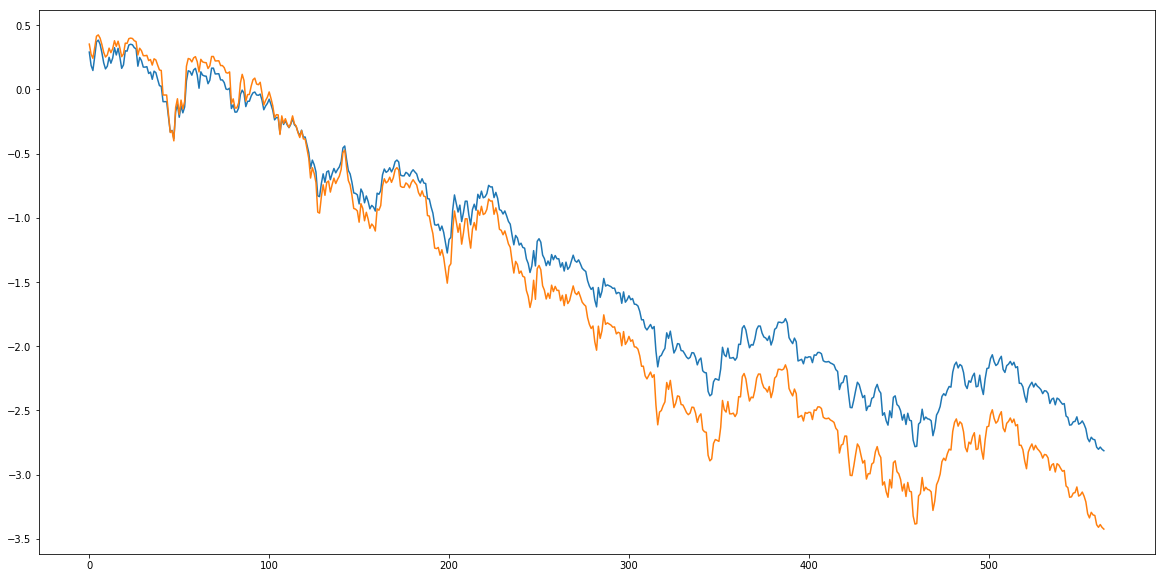

In [51]:
y_pred = model.predict(y_test)
plt.plot(y_test)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))
plt.show()

### Analysis
The graph above shows the predicted model created by tensorflow's neural network using an ReLU activation function and a mean squared error loss function. An ReLU stands for a Rectified Linear Unit. ReLU's are used in almost all convolutional neural networks or deep learning.

Mean squared error loss function is an estimator that measures the average of the squares of the errors or deviations, the difference between the estimator and what is estimated.

#### Significance of R-squared value
R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

### Conclusion
An r-value of 0.865774 is decent, but it doesn't nessecarily mean that the model is a good fit. It is advised that R-squared values should be used in conjunction with residual plots, other model statistics, and subject area knowledge.

The graph above shows a close fit, and closing prices for stocks are usually not predictable since they dont follow a pattern. But we were still able to build good models that can predict closing price based off of signal and date.

Ways of making the model better include changing the optimizer, and possibly using a sliding window to make a closer fit to data in the short term, since stocks are so unpredictable.